### Assignment 1

#### Ex. 2.1.1: 
The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to sklearn.ensemble.RandomForestClassifier controls, and how setting it either too low or too high (or True/False) might hurt model performance:

1. n_estimators
2. max_depth
3. max_features
4. bootstrap

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
RandomForestClassifier()

sklearn.ensemble.forest.RandomForestClassifier

From the package description it is clear that:

1. n_estimators determines the number of trees in the forest. Setting it to high will mean . Setting it to low will mean. Default is 100 in the newest version.



2. max_depth is the maximum depth of the tree. If set to None it means the nodes are expanded untill all leaves are pure or until all leaves contain less than min_samples_split samples. Setting it to high will mean more splits and more information about the data captured, but it will also prone the model to overfitting makeing the model preform bad when attempting to generalizie to the test set. On the other hand setting the number to low will make the model underfit. The way to find a balance between the two is to compare test and traning scores and adjust gradually.




3. max_features is the number of features to consider when looking for the best split. Setting the number high can mean several things. One, it sets high computational requirements, as the computer will have to calculate the entropy for every single option. Two, it can prone the model to over-fitting. Setting two low can mean underfitting, but there is an automatic feature kicking in; "Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.".




4. bootstrap is a true/false parameter, decides wheter bootstap samples are used when building trees. If in effect it will add statistical properties to the model building.

#### Ex. 2.1.2: 
For n_estimators > how should one set the hyper-parameters max_features and bootstrap so that all the trees in the ensemble end up identical?

The less features taken into consideration the more identical the trees will end up as few differences in that case can set them apart. Bootstrap adds statistical precision to the model contructed from the trees, and affects the data-samples used to construct the trees, but I don't think the replacement of data will result in more identical trees. I would think boot-strap mostely affects the model not how identical the trees are. 

#### Ex. 3.1.2: 
Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.

1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.

Hint: You can use this class for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.

##### Load data

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

##### Attempt to use Ulfs class

In [7]:
class cmap_in_categories:
    """Create map to range of colors inside given categories.
    Example
    -------
    >>> cmap = cmap_in_categories(['cats', 'dogs', 'squirrels'])
    >>> cmap('squirrels')
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_categories, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain_map = dict(list(zip(cmap_categories, list(range(len(cmap_categories))))))
        self.cmap_domain = [min(self.cmap_domain_map.values()), max(self.cmap_domain_map.values())]
        self.cmap_categories = cmap_categories
        self.cmap_range = cmap_range
        self.m = interp1d(self.cmap_domain, self.cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, category):
        if not category in self.cmap_categories:
            raise Exception("Category must be inside cmap_categories.")
        return self.cmap(self.m(self.cmap_domain_map[category]))

In [ ]:
#Don't know how.

#### Scale

In [2]:
from sklearn.preprocessing import StandardScaler
X_wine_std = StandardScaler().fit_transform(X_wine)
X_digits_std = StandardScaler().fit_transform(X_digits)

#### Dimensionality reduction

In [3]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine_std)
X_digits_pca = pca.fit_transform(X_digits_std)

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda_wine = lda.fit_transform(X_wine_std, y_wine)
X_lda_digits = lda.fit_transform(X_digits_std, y_digits)

#T-SNE
from sklearn.manifold import TSNE
tsne = TSNE()
X_tsne_wine = tsne.fit_transform(X_wine_std)
X_tsne_digits = tsne.fit_transform(X_digits_std)

#U-MAP
import umap
um = umap.UMAP()
X_um_wine = um.fit_transform(X_wine_std)
X_um_digits = um.fit_transform(X_digits_std)

C:\Users\krmmm\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### Figures

##### Wine

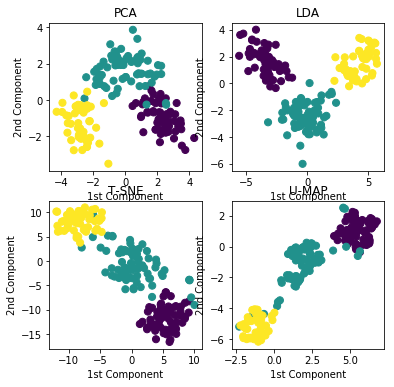

In [23]:
#PCA
fig =plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(2,2,1)
ax1.set_xlabel('1st Component')
ax1.set_ylabel('2nd Component')
ax1.set_title('PCA')
colors = ['r', 'p', 'o', 'g', 'b']
ax1.scatter(X_wine_pca[:,0], X_wine_pca[:,1], c= y_wine, s=50)


#LDA
ax2 = fig.add_subplot(2,2,2)
ax2.set_xlabel('1st Component')
ax2.set_ylabel('2nd Component')
ax2.set_title('LDA')
colors = ['r', 'p', 'o', 'g', 'b']
ax2.scatter(X_lda_wine[:,0], X_lda_wine[:,1], c= y_wine, s=50)

#T-SNE
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('1st Component')
ax3.set_ylabel('2nd Component')
ax3.set_title('T-SNE')
colors = ['r', 'p', 'o', 'g', 'b']
ax3.scatter(X_tsne_wine[:,0], X_tsne_wine[:,1], c= y_wine, s=50)


#U-MAP
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('1st Component')
ax4.set_ylabel('2nd Component')
ax4.set_title('U-MAP')
colors = ['r', 'p', 'o', 'g', 'b']
ax4.scatter(X_um_wine[:,0], X_um_wine[:,1], c= y_wine, s=50)


###### Digits

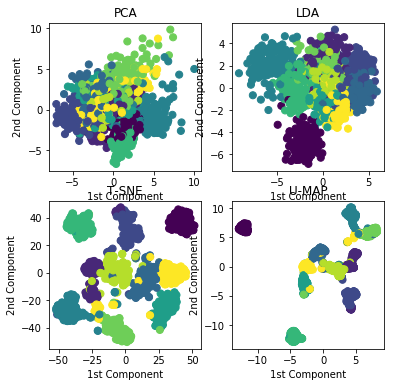

In [24]:
#PCA
fig =plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(2,2,1)
ax1.set_xlabel('1st Component')
ax1.set_ylabel('2nd Component')
ax1.set_title('PCA')
colors = ['r', 'p', 'o', 'g', 'b']
ax1.scatter(X_digits_pca[:,0], X_digits_pca[:,1], c= y_digits, s=50)


#LDA
ax2 = fig.add_subplot(2,2,2)
ax2.set_xlabel('1st Component')
ax2.set_ylabel('2nd Component')
ax2.set_title('LDA')
colors = ['r', 'p', 'o', 'g', 'b']
ax2.scatter(X_lda_digits[:,0], X_lda_digits[:,1], c= y_digits, s=50)

#T-SNE
ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel('1st Component')
ax3.set_ylabel('2nd Component')
ax3.set_title('T-SNE')
colors = ['r', 'p', 'o', 'g', 'b']
ax3.scatter(X_tsne_digits[:,0], X_tsne_digits[:,1], c= y_digits, s=50)


#U-MAP
ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel('1st Component')
ax4.set_ylabel('2nd Component')
ax4.set_title('U-MAP')
colors = ['r', 'p', 'o', 'g', 'b']
ax4.scatter(X_um_digits[:,0], X_um_digits[:,1], c= y_digits, s=50)

##### Comment

For the Wine data-sets all dimensionality reducing methods deliver clearly seperated clusters. LDA is perhaps the best performing method.

For the Digits data-set PCA performs porly resulting in one big cluster. T-SNE and U-MAP both preform well delivering clearly seperated clusters, so the unsupervised methods preforms best on this data-set.


#### Ex. 4
In this problem we will try to implement and understand some of the ideas used in Athey, Imbens (2015) to develop Honest Inference in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

#### Ex. 4.2.1: 

What does it mean that a tree is honest? In particular what are the implications in terms of

- The intuition for why honesty is required in order to get good local treatment effect estimates?
- The practical implementation of the DT algorithm?

- Honesty prevents data-leakage and allows honest evaluation of model performance. With honest estimation it is possible to measure treatment effects within each partitioning group as they will be represented by a leaf in the model. Half of the data is used to place partitions into category based on outcome similarity and ensure enough treatment partitioners and control partitioners in each leaf. The other half es used for estimating the actual treatment effects. The process is similar to splitting into train and test. 


- DT algorithm 
I am unsure of what "DT" is short for, but I guess this question in related to the one above and will comment on the pratical implementation of Honesty. 
Practically Honesty is implemented by splitting data into test and train. A decision tree is then trained on the training set taken into condition that enough treatment and control partitioners are "represented" in each leaf. The estimated decision tree is the applied to the unseen test data and the treatment effect is estimated from the results. 